<a href="https://colab.research.google.com/github/Sinchan08/Web_scrap_project/blob/main/WebScrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feedparser beautifulsoup4 wordcloud pandas matplotlib


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=82b6a6688e74c122591dff0e059612f1d0ed3f57ec75dcf833145f9b96fe1b47
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [2]:
import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup

# Define categories
CATEGORIES = {
    "AI": "cs.AI",
    "Data Science": "cs.LG",
    "Blockchain": "cs.CR"
}

# Function to fetch research papers
def fetch_arxiv_papers(category, max_results=5):
    base_url = "http://export.arxiv.org/api/query?"
    query = f"search_query=cat:{category}&start=0&max_results={max_results}"
    response = requests.get(base_url + query)

    if response.status_code != 200:
        print("Error fetching data")
        return []

    feed = feedparser.parse(response.content)

    papers = []
    for entry in feed.entries:
        soup = BeautifulSoup(entry.summary, "html.parser")  # Clean abstract
        paper = {
            "Title": entry.title,
            "Authors": ", ".join(author.name for author in entry.authors),
            "Abstract": soup.text,
            "Published Date": entry.published,
            "arXiv Link": entry.link
        }
        papers.append(paper)

    return papers

# Fetch papers from different categories
all_papers = []
for category, code in CATEGORIES.items():
    print(f"Fetching {category} papers...")
    papers = fetch_arxiv_papers(code, max_results=5)
    for paper in papers:
        paper["Category"] = category
    all_papers.extend(papers)

# Convert to DataFrame
df = pd.DataFrame(all_papers)

# Display results
df.head()


Fetching AI papers...
Fetching Data Science papers...
Fetching Blockchain papers...


,Title,Authors,Abstract,Published Date,arXiv Link,Category
0,Dynamic Backtracking,M. L. Ginsberg,Because of their occasional need to return to ...,1993-08-01T00:00:00Z,http://arxiv.org/abs/cs/9308101v1,AI
1,A Market-Oriented Programming Environment and ...,M. P. Wellman,Market price systems constitute a well-underst...,1993-08-01T00:00:00Z,http://arxiv.org/abs/cs/9308102v1,AI
2,An Empirical Analysis of Search in GSAT,"I. P. Gent, T. Walsh",We describe an extensive study of search in GS...,1993-09-01T00:00:00Z,http://arxiv.org/abs/cs/9309101v1,AI
3,The Difficulties of Learning Logic Programs wi...,"F. Bergadano, D. Gunetti, U. Trinchero",As real logic programmers normally use cut (!)...,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311101v1,AI
4,Software Agents: Completing Patterns and Const...,"J. C. Schlimmer, L. A. Hermens",To support the goal of allowing users to recor...,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311102v1,AI


In [3]:
df.to_csv("arxiv_papers.csv", index=False)

# Provide a download link
from google.colab import files
files.download("arxiv_papers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

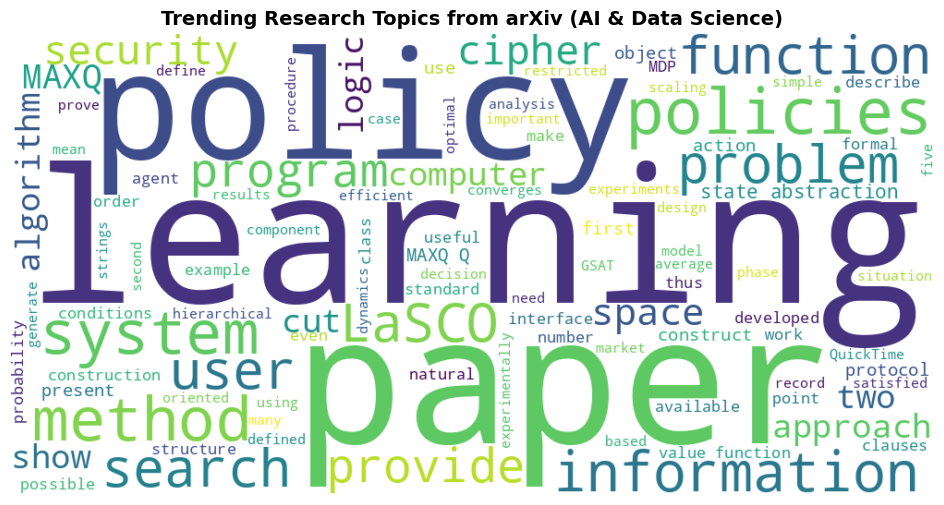

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Combine all abstracts into one text
text = " ".join(df["Abstract"])

# Define stopwords to remove common words
stopwords = set(STOPWORDS)

# Generate a professional word cloud
wordcloud = WordCloud(
    width=1000, height=500,
    background_color="white",
    colormap="viridis",  # Modern color scheme
    stopwords=stopwords,  # Removes common words
    max_words=100,  # Limits word count for clarity
    contour_width=2, contour_color="black"  # Adds a sleek outline
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Research Topics from arXiv (AI & Data Science)", fontsize=14, fontweight="bold")
plt.show()


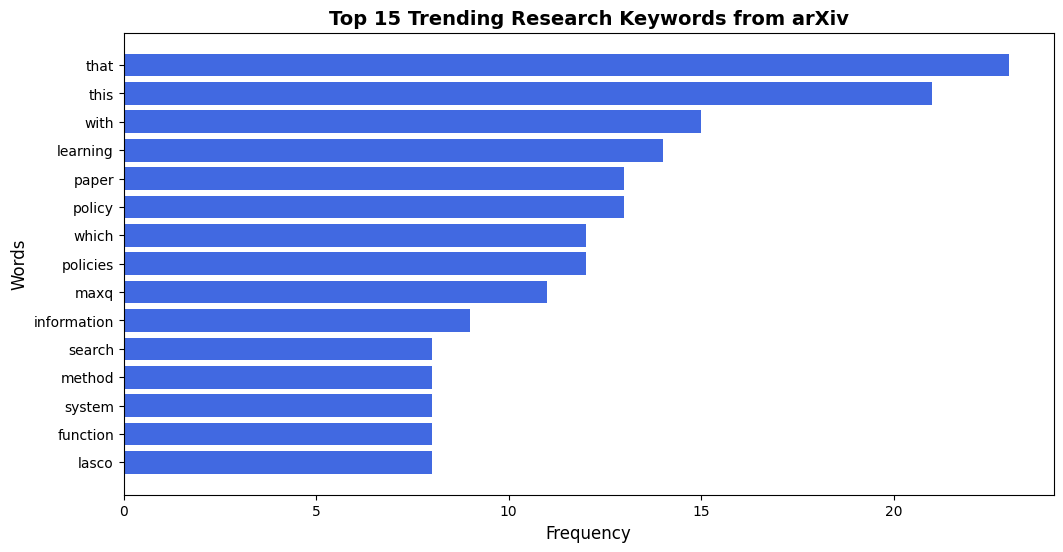

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

# Combine all abstracts into one text
text = " ".join(df["Abstract"])

# Remove special characters & convert to lowercase
words = re.findall(r"\b[a-zA-Z]{4,}\b", text.lower())  # Min length 4 to avoid short words

# Count word frequency
word_counts = Counter(words)
common_words = word_counts.most_common(15)  # Get top 15 words

# Convert to DataFrame
df_words = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(df_words["Word"], df_words["Frequency"], color="royalblue")
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.title("Top 15 Trending Research Keywords from arXiv", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # Flip order for better readability
plt.show()


In [8]:
from tabulate import tabulate

# Print words in a nice tabular format
print(tabulate(df_words, headers="keys", tablefmt="pretty"))


+----+-------------+-----------+
|    |    Word     | Frequency |
+----+-------------+-----------+
| 0  |    that     |    23     |
| 1  |    this     |    21     |
| 2  |    with     |    15     |
| 3  |  learning   |    14     |
| 4  |    paper    |    13     |
| 5  |   policy    |    13     |
| 6  |    which    |    12     |
| 7  |  policies   |    12     |
| 8  |    maxq     |    11     |
| 9  | information |     9     |
| 10 |   search    |     8     |
| 11 |   method    |     8     |
| 12 |   system    |     8     |
| 13 |  function   |     8     |
| 14 |    lasco    |     8     |
+----+-------------+-----------+
